In [5]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [6]:
size = '124M'

loss_baseline = {
  "124M": 3.2924
}[size]

hellaswag_gpt2_baseline = { # HellaSwag for GPT-2
    "124M": 0.294463,
    "350M": 0.375224,
    "774M": 0.431986,
    "1558M": 0.488946,
}[size]

hellaswag_gpt3_baseline = { # HellaSwag for GPT-3
    "124M": 0.337,
    "350M": 0.436,
    "774M": 0.510,
    "1558M": 0.547,
}[size]

In [7]:
# load the log file
with open("log/log.txt", "r") as f:
    lines = f.readlines()

# parse each line and group by stream (TRAIN, VAL, HELLASWAG)
streams = {}
for line in lines:
    step, stream, value = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(value)

# convert each stream from {step: value} to (steps[], values[]) for easier for plotting
streams_xy = {}
for k, v in streams.items():
    xy = sorted(list(v.items())) # get all (step, value) items, sort them by value
    streams_xy[k] = list(zip(*xy)) # unpack the list of tuples to tuple of lists

Minimum Train Loss: 2.8811
Minimum Validation Loss: 3.0713
Minimum Train Loss: 0.2353
Max Hellaswag Accuracy: 0.3072


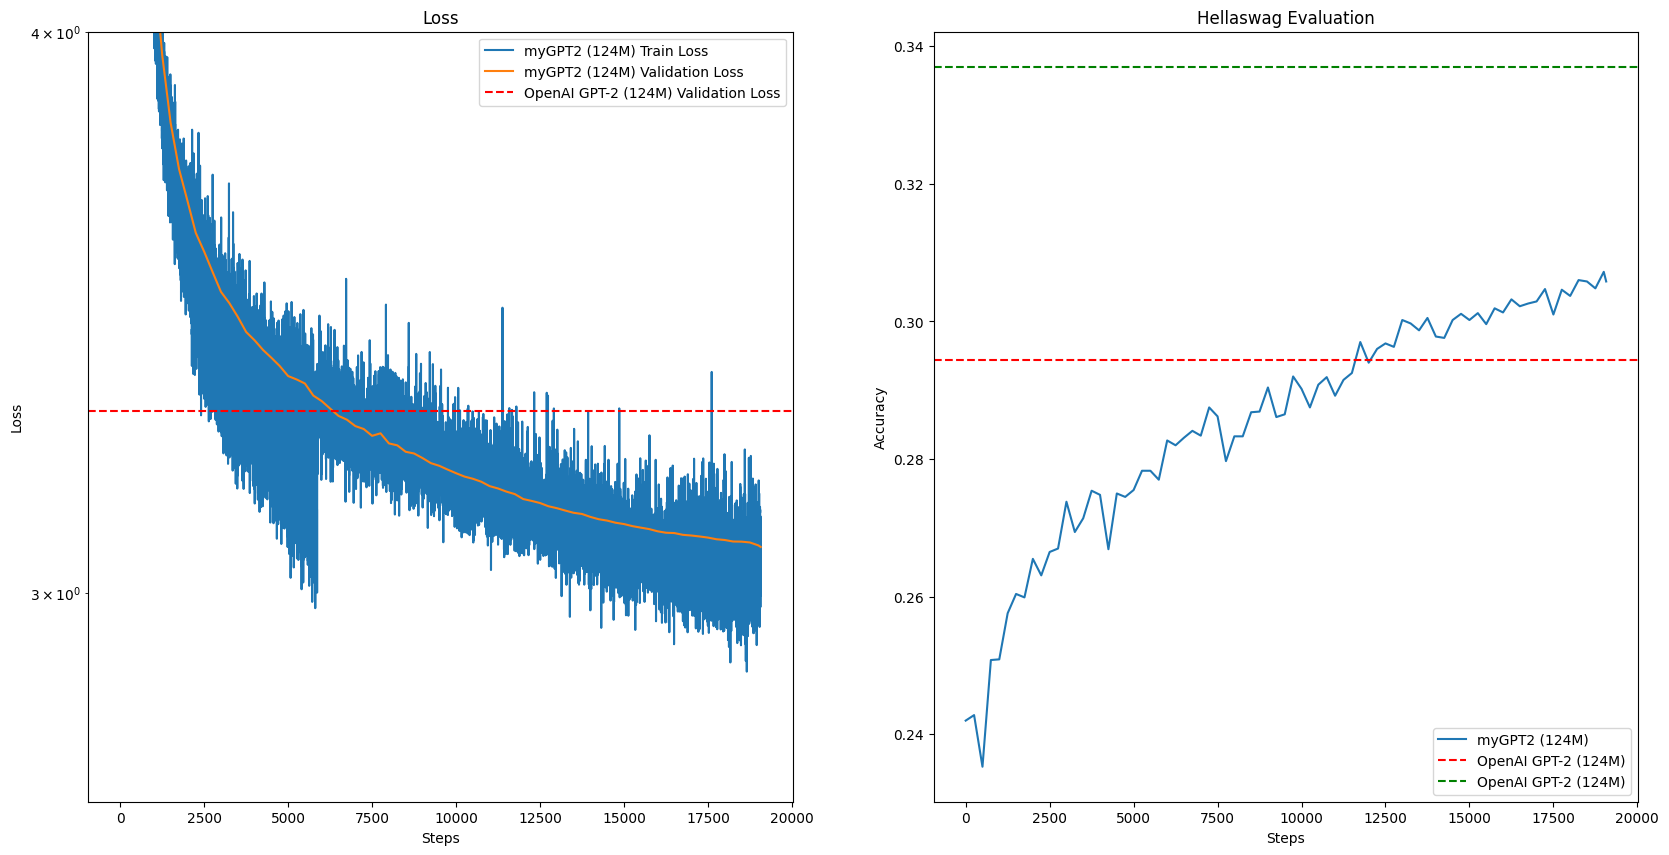

In [9]:
# create a figure
plt.figure(figsize=(20, 10))

# Panel 1: Train and Validation Losses
plt.subplot(121)
xs, ys = streams_xy["TRAIN"] # training data
ys = np.array(ys)
plt.plot(xs, ys, label=f"myGPT2 ({size}) Train Loss")
print(f"Minimum Train Loss: {min(ys)}")

xs, ys = streams_xy["VAL"] # validation data
ys = np.array(ys)
plt.plot(xs, ys, label=f"myGPT2 ({size}) Validation Loss")
print(f"Minimum Validation Loss: {min(ys)}")

if loss_baseline is not None:
  plt.axhline(y=loss_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({size}) Validation Loss")

plt.xlabel("Steps")
plt.ylabel("Loss")
plt.yscale("log")
plt.ylim(top=4.0)
plt.legend()
plt.title("Loss")

# Panel 2: Hellaswag Evaluation
plt.subplot(122)
xs, ys = streams_xy["HELLASWAG"] # training data
ys = np.array(ys)
plt.plot(xs, ys, label=f"myGPT2 ({size})")

if hellaswag_gpt2_baseline is not None:
  plt.axhline(y=hellaswag_gpt2_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({size})")
if hellaswag_gpt3_baseline is not None:
  plt.axhline(y=hellaswag_gpt3_baseline, color='g', linestyle='--', label=f"OpenAI GPT-2 ({size})")

plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Hellaswag Evaluation")
print(f"Max Hellaswag Accuracy: {max(ys)}")